**Importing python modules**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib import style

Input


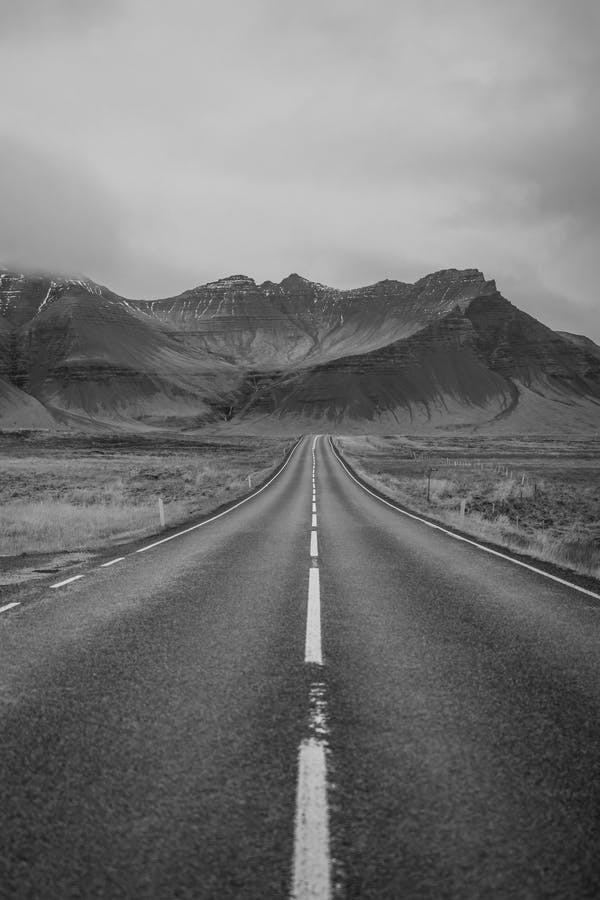

(900, 600)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 3, 2, 7, 9, 18, 35, 41, 51, 53, 85, 97, 129, 139, 200, 250, 297, 401, 450, 513, 609, 748, 848, 1025, 1143, 1395, 1466, 1712, 1945, 2278, 2537, 2820, 3148, 3506, 3754, 4129, 4278, 4681, 5082, 5183, 5357, 5711, 5609, 5991, 6127, 6228, 6090, 5878, 5837, 5545, 5344, 5144, 5226, 5225, 5072, 5200, 5290, 5263, 5179, 5157, 5110, 4829, 4650, 4797, 4664, 4672, 4666, 4640, 4495, 4473, 4408, 4363, 4321, 4346, 4361, 4309, 4177, 4225, 4216, 4208, 4241, 4073, 4145, 3892, 3853, 3795, 3727, 3533, 3462, 3346, 3239, 3133, 3051, 2959, 2764, 2686, 2516, 2448, 2317, 2304, 2136, 2153, 1974, 1972, 1920, 1846, 1762, 1721, 1660, 1623, 1621, 1610, 1504, 1509, 1475, 1460, 1422, 1427, 1372, 1190, 1139, 1075, 991, 924, 982, 984, 1029, 1190, 1216, 1150, 1300, 1223, 1239, 1269, 1305, 1501, 1316, 1332, 1477, 1447, 1561, 1484, 1356, 1445, 1649, 1924, 1591, 1969, 2122, 2622, 2741, 2718, 2794, 2510, 2575, 2423, 2509, 2578, 2634, 2661, 2875, 2773, 405

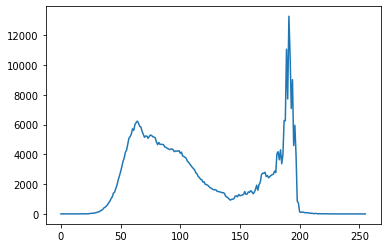

Output by threshold at 140:


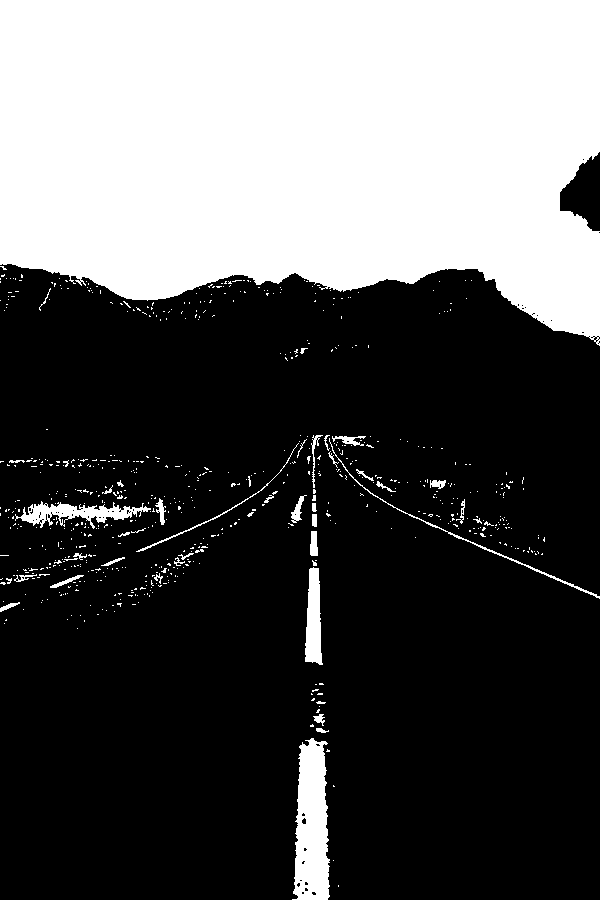

In [ ]:
#task1
img=cv2.imread('2.jpeg',0)
print('Input')
cv2_imshow(img)
print(img.shape)
h,w=img.shape
hist=[]
for x in range(0,256):
  hist.append(0)

for x in range(h):
  for y in range(w):
    val=img[x][y]
    hist[val]+=1

print(hist)

t=np.arange(0,256,1)

print("Histogram:")
plt.plot(t,hist)
plt.show()

thres=140
for x in range(h):
  for y in range(w):
    if img[x][y]>thres:
      img[x][y]=255
    else:
      img[x][y]=0

print('Output by threshold at 140:')
cv2_imshow(img)

Input


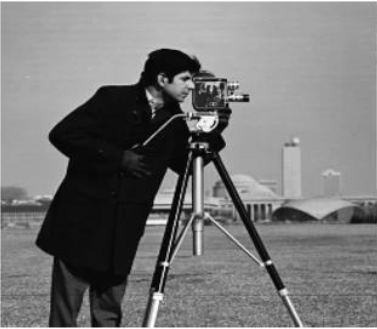

(329, 377)
[[  0   0   0 ...   0   0   0]
 [  0 203 203 ... 204   0   0]
 [  0 156 156 ... 164   0   0]
 ...
 [  0 252 253 ... 250   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Average filtering:


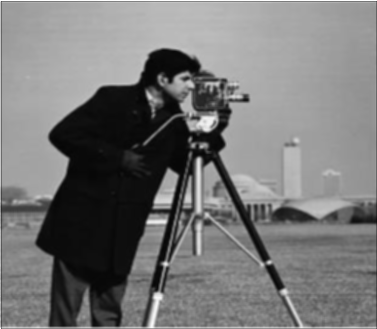

In [ ]:
#task2
#img=cv2.imread('2.jpeg',0)
img=cv2.imread('cameraman.PNG',0)

print('Input')
cv2_imshow(img)
print(img.shape)
h,w=img.shape
nh=h+2
nw=w+2
mask=[[0.111,0.111,0.111],[0.111,0.111,0.111],[0.111,0.111,0.111]]

padded_img=a = np.zeros([nh, nw], dtype = int)

for x in range(1,h,1):
  for y in range(1,w,1):
     padded_img[x][y]=img[x][y]

for x in range(1,h,1):
  for y in range(1,w,1):
    val=0
    for i in range(x-1,x+2):
      for j in range(y-1,y+2):
          val+=0.111*padded_img[i][j]
    img[x][y]=val

print(padded_img)
print("Average filtering:")
cv2_imshow(img)

Input


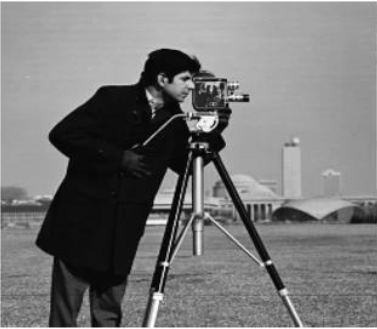

(329, 377)
Padded Image:
[[  0   0   0 ...   0   0   0]
 [  0 203 203 ... 204   0   0]
 [  0 156 156 ... 164   0   0]
 ...
 [  0 252 253 ... 250   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Row edge detection:


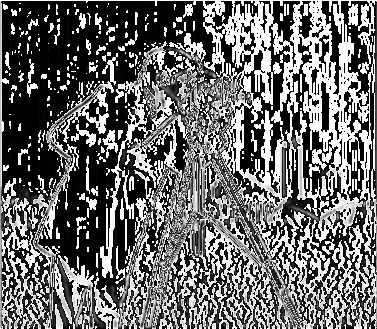

In [ ]:
#task3
#row edge detection
#img=cv2.imread('2.jpeg',0)
img=cv2.imread('cameraman.PNG',0)

#cv2_imshow(src)
#img = cv2.fastNlMeansDenoising(src,None,3,7,21)

print('Input')
cv2_imshow(img)
print(img.shape)
h,w=img.shape
nh=h+2
nw=w+2
maskx=[[-1,0,1],[-1,0,1],[-1,0,1]]
padded_img=a = np.zeros([nh, nw], dtype = int)

for x in range(1,h,1):
  for y in range(1,w,1):
     padded_img[x][y]=img[x][y]

for x in range(1,h,1):
  for y in range(1,w,1):
    val=0
    indx=0
    for i in range(x-1,x+2):
      indy=0
      for j in range(y-1,y+2):
          val+=maskx[indx][indy]*padded_img[i][j]
          indy+=1
    img[x][y]=val
    indx+=1
print("Padded Image:")
print(padded_img)
print("Row edge detection:")
cv2_imshow(img)



Input


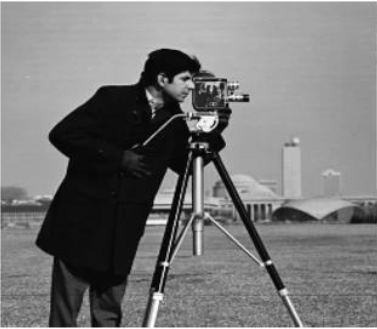

(329, 377)
Column edge detection:


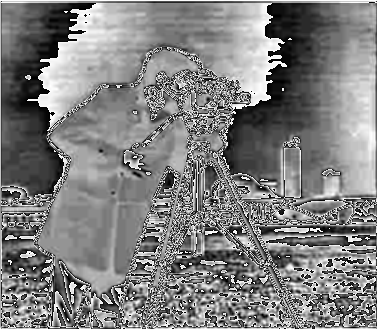

In [ ]:
#task4
#column edge detection
#img=cv2.imread('2.jpeg',0)
img=cv2.imread('cameraman.PNG',0)

print('Input')
cv2_imshow(img)
print(img.shape)
h,w=img.shape
nh=h+2
nw=w+2
#maskx=[[-1,0,1],[-1,0,1],[-1,0,1]]
masky=[[-1,-1,-1],[0,0,0],[1,1,1]]
padded_img=a = np.zeros([nh, nw], dtype = int)

for x in range(1,h,1):
  for y in range(1,w,1):
     padded_img[x][y]=img[x][y]

for x in range(1,h,1):
  for y in range(1,w,1):
    val=0
    indx=0
    for i in range(x-1,x+2):
      indy=0
      for j in range(y-1,y+2):
          val+=masky[indx][indy]*padded_img[i][j]
          indy+=1
    img[x][y]=val
    indx+=1

#print(padded_img)
print("Column edge detection:")
cv2_imshow(img)

